In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
# can use any library

Name: Sean Meade

ID: 10128921

In [208]:
# Expand default number of rows printed for Pandas
pd.options.display.max_rows = 600

Before starting I have renamed the following  attributes to allow easier analysis and clarity:

1. **`default → credit_in_default`**  

2. **`balance → avg_yearly_balance`**  
3. **`housing → housing_loan`**  
4. **`loan → personal_loan`**  
5. **`contact → contact_type`**  
6. **`day → last_contact_day_of_month`**  
7. **`month → last_contact_month_of_year`**  
8. **`duration → last_contact_duration`**  
9. **`campaign → number_of_campaign_contacts`**  
10. **`pdays → days_since_prev_campaign_contact`**  
11. **`previous → previous_campaign_contacts`**  
12. **`poutcome → prev_campaign_outcome`**  

In [209]:
# Load dataset
df = pd.read_csv('./bank.csv', header=0)

# Dictionary mapping old column names to new ones
rename_dict = {
    "default": "credit_in_default",
    "balance": "avg_yearly_balance",
    "housing": "housing_loan",
    "loan": "personal_loan",
    "contact": "contact_type",
    "day": "last_contact_day_of_month",
    "month": "last_contact_month_of_year",
    "duration": "last_contact_duration",
    "campaign": "number_of_campaign_contacts",
    "pdays": "days_since_prev_campaign_contact",
    "previous": "previous_campaign_contacts",
    "poutcome": "prev_campaign_outcome"
}

# Rename columns
df.rename(columns=rename_dict, inplace=True)

# Take out numeric data
df_numeric = df.select_dtypes(include=['number'])

df_categorical = df.select_dtypes(include=['object'])

# Task 1: Exploratory Data Analysis (EDA)

##### _Perform EDA of the bank dataset_

- Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).
- Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
- Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- Make sure your conclusions are related to the question you have formulated.

TODO: Move to appendix when done

#### Bank Client Data Description from [archive.ics.uci.edu](https://archive.ics.uci.edu/dataset/222/bank+marketing):

Slightly audited description of the dataset from archive.ics.uci.edu including the name changes above:

1. **age**: Age of client (numeric)
2. **job**: Type of job (categorical: "admin.", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
3. **marital**: Marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
4. **education**: Level of education (categorical: "secondary", "primary", "tertiary")
5. **credit_in_default**: Has credit in default (the borrower has failed to meet the agreed-upon repayment terms of a loan or credit agreement)? (binary: "yes", "no")
6. **avg_yearly_balance**: Average yearly balance, in euros (numeric - can be negative)
7. **housing_loan**: Has housing loan? (binary: "yes", "no")
8. **personal_loan**: Has personal loan? (binary: "yes", "no")

#### Related with the last contact of the current campaign:

9. **contact_type**: Contact communication type (categorical: "telephone", "cellular")
10. **last_contact_day_of_month**: Last contact day of the month (numeric)
11. **last_contact_month_of_year**: Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. **last_contact_duration**: Last contact duration, in seconds (numeric)

#### Other attributes:

13. **number_of_campaign_contacts**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **days_since_prev_campaign_contact**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. **previous_campaign_contacts**: Number of contacts performed before this campaign and for this client (numeric)
16. **prev_campaign_outcome**: Outcome of the previous marketing campaign (categorical: "other", "failure", "success")

#### Output variable (desired target):

17. **subscribed**: Has the client subscribed a term deposit? (binary: "yes", "no")


### Quick look at the first and last 5 rows of the dataframe:

In [210]:
# Look at the head and tail together
df

,age,job,marital,education,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,contact_type,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts,prev_campaign_outcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes


## _Formulate a particular question that might be interesting to answer by exploring the bank dataset_

_What is the profile of the people that subscribe a term deposit and what is the profile that don't?_

## Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

In [211]:
# Print statistical summary for all numerical attributes
df_numeric.describe()

,age,avg_yearly_balance,last_contact_day_of_month,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [212]:
df_categorical.describe()

,job,marital,education,credit_in_default,housing_loan,personal_loan,contact_type,last_contact_month_of_year,prev_campaign_outcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


In [213]:
df_numeric.skew()

age                                  0.853921
avg_yearly_balance                  11.461564
last_contact_day_of_month            0.403661
last_contact_duration                2.045787
number_of_campaign_contacts          2.320856
days_since_prev_campaign_contact     0.920006
previous_campaign_contacts           5.461168
dtype: float64

In [214]:
for col in df_categorical.columns:
    print(f"Column: {col}")
    display(df_categorical[col].value_counts(dropna=False))

Column: job


job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
NaN               10
Name: count, dtype: int64

Column: marital


marital
married     1111
single       674
divorced     215
Name: count, dtype: int64

Column: education


education
secondary    995
tertiary     684
primary      217
NaN          104
Name: count, dtype: int64

Column: credit_in_default


credit_in_default
no     1985
yes      15
Name: count, dtype: int64

Column: housing_loan


housing_loan
no     1037
yes     963
Name: count, dtype: int64

Column: personal_loan


personal_loan
no     1750
yes     250
Name: count, dtype: int64

Column: contact_type


contact_type
cellular     1663
NaN           191
telephone     146
Name: count, dtype: int64

Column: last_contact_month_of_year


last_contact_month_of_year
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: count, dtype: int64

Column: prev_campaign_outcome


prev_campaign_outcome
failure    955
NaN        454
success    444
other      147
Name: count, dtype: int64

Column: subscribed


subscribed
no     1000
yes    1000
Name: count, dtype: int64

Missing values:

| Column                           | Missing Values | Percentage Missing |
|----------------------------------|----------------|--------------------|
| prev_campaign_outcome            | 454            | 22.70%             |
| contact_type                     | 191            | 9.55%              |
| education                        | 104            | 5.20%              |
| age                              | 12             | 0.60%              |
| job                              | 10             | 0.50%              |


Less than 1% of people have credit in default (`credit_in_default`).

`avg_yearly_balance`, `previous_campaign_contacts`, `number_of_campaign_contacts`, and `previous_campaign_contacts` are all classified as highly skewed meaning that the mean is pulled toward the tail and away from the median. 

`credit_in_default`, `housing_loan`, `personal_loan`, and `subscribed` are all binary categorical data.

Discover patterns in the form of if-then rules

eg: if outlook = sunny and humidity > 83 then play = no

#### 1. **age** :


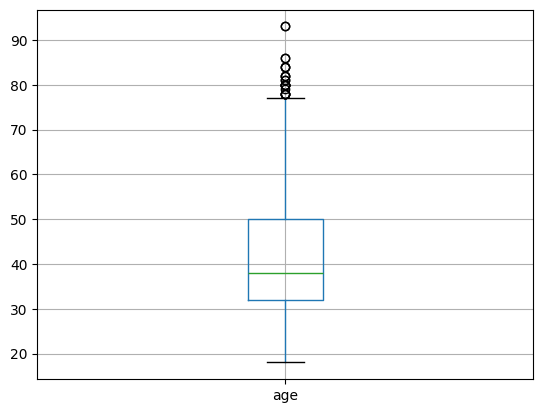

In [215]:
df.boxplot(column='age')
plt.show()

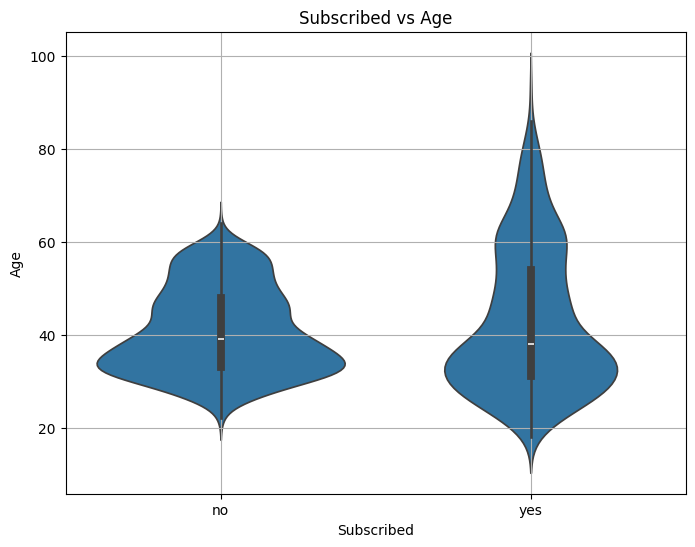

In [216]:
# Using seaborn to create a scatter plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='subscribed', y='age')
plt.title('Subscribed vs Age')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.grid(True)
plt.show()

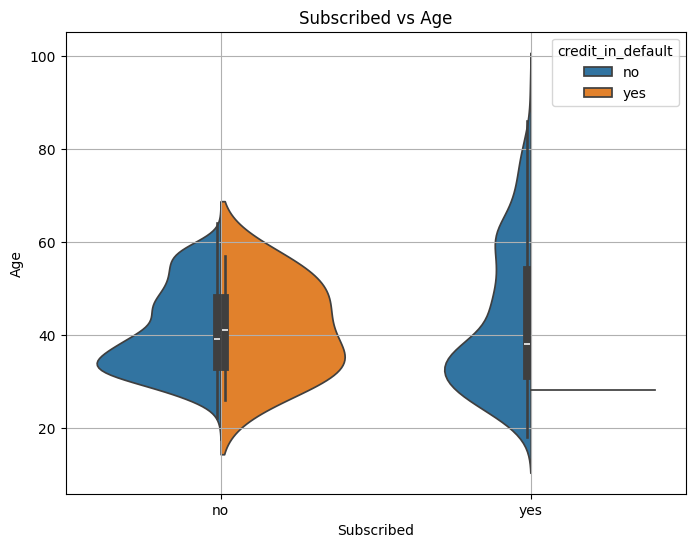

In [217]:
# Using seaborn to create a scatter plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='subscribed', y='age', hue='credit_in_default', split=True)
plt.title('Subscribed vs Age')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [218]:
(df['credit_in_default'] == "yes").shape[0]

2000

In [219]:
df['credit_in_default'].value_counts()

credit_in_default
no     1985
yes      15
Name: count, dtype: int64

In [220]:
df[(df['subscribed'] == "yes") & (df['credit_in_default'] == "yes")]

,age,job,marital,education,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,contact_type,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts,prev_campaign_outcome,subscribed
1278,28.0,management,single,tertiary,yes,1414,yes,no,cellular,8,jul,294,1,521,1,failure,yes


In [221]:
subscribed = df[(df['subscribed'] == "yes") & (df['credit_in_default'] == "yes")].shape[0]
not_subscribed = df[(df['subscribed'] == "yes") & (df['credit_in_default'] == "no")].shape[0]

print(f"Number of subscribers with credit in default: {subscribed}/{df[(df['subscribed'] == "yes")].shape[0]}")
print(f"Number of subscribers with no credit in default: {not_subscribed}/{df[(df['subscribed'] == "yes")].shape[0]}")
print()

subscribed = df[(df['subscribed'] == "no") & (df['credit_in_default'] == "yes")].shape[0]
not_subscribed = df[(df['subscribed'] == "no") & (df['credit_in_default'] == "no")].shape[0]

print(f"Number of non-subscribers with credit in default: {subscribed}/{df[(df['subscribed'] == "yes")].shape[0]}")
print(f"Number of non-subscribers with no credit in default: {not_subscribed}/{df[(df['subscribed'] == "yes")].shape[0]}")

Number of subscribers with credit in default: 1/1000
Number of subscribers with no credit in default: 999/1000

Number of non-subscribers with credit in default: 14/1000
Number of non-subscribers with no credit in default: 986/1000


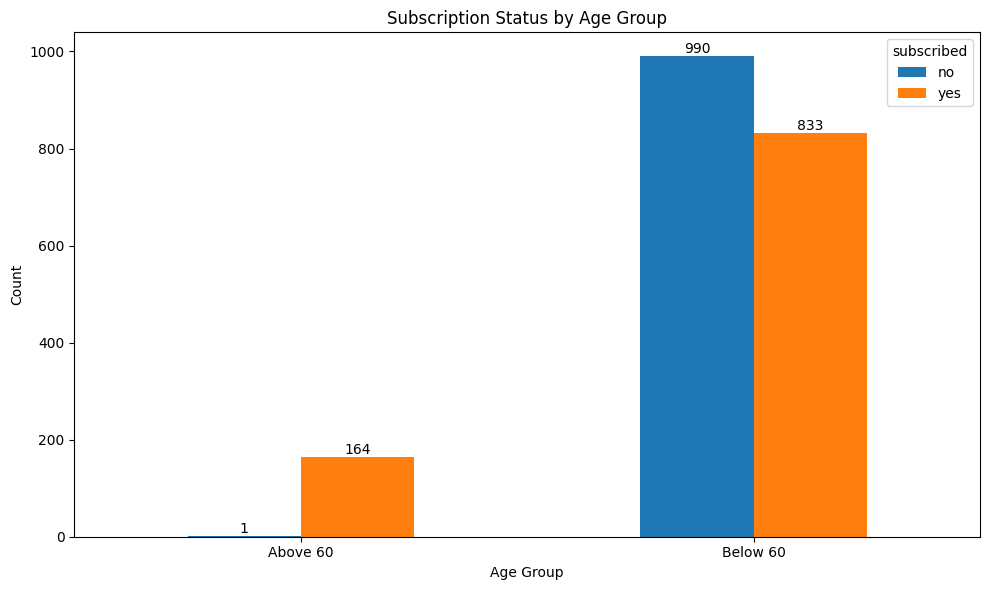

In [222]:
# Filter out 0 and NaN values
filtered_df = df[(df['age'] > 0) & (df['age'].notna()) & (df['subscribed'].notna())].copy()

# Create age groups
filtered_df['age_group'] = np.where(filtered_df['age'] > 60, 'Above 60', 'Below 60')

# Group by age group and subscription status, then count
grouped = filtered_df.groupby(['age_group', 'subscribed']).size().unstack()

# Plot
ax = grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Subscription Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add numbers above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

From the above plot our data suggests that people over 60 are likely to subscribe.

One person with credit in default is subscribed. Fourteen people are non-subscribers with credit in default.

From the above we can tell that 164 out of 165 over 60's subscribed (only 8.25%). Where below 60's are slight more inclined to not subscribe.

It is a small sample of over 60's but still over 99% of them subscribed.

If they have a loan they are more likely to not subscribe.

I think from this plot it can be concluded that January (245 no and 0 yes) and February (404 no and 0 yes) are bad months to try an subscribe a potential client. Where as between June and October (with a combined 631 yes and 3 no).

2. **job** :

3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)


4. education: level of education (categorical:"secondary","primary","tertiary")


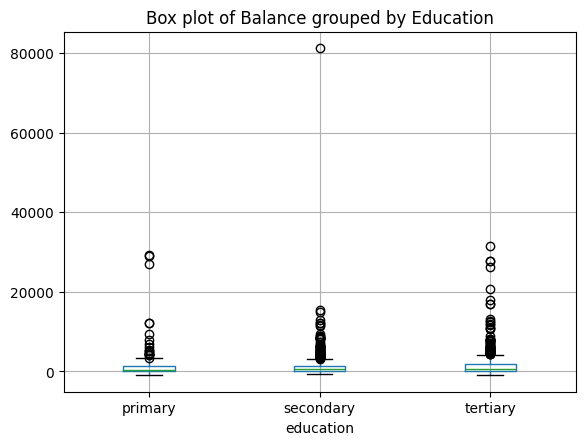

In [223]:
# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='avg_yearly_balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

5. credit_in_default: has credit in default (the borrower has failed to meet the agreed-upon repayment terms of a loan or credit agreement)? (binary: "yes","no")


In [224]:
((df['credit_in_default'] == 'yes') & (df['personal_loan'] == 'yes')).sum()

np.int64(6)

6. avg_yearly_balance: average yearly balance, in euros (numeric - can be negative)

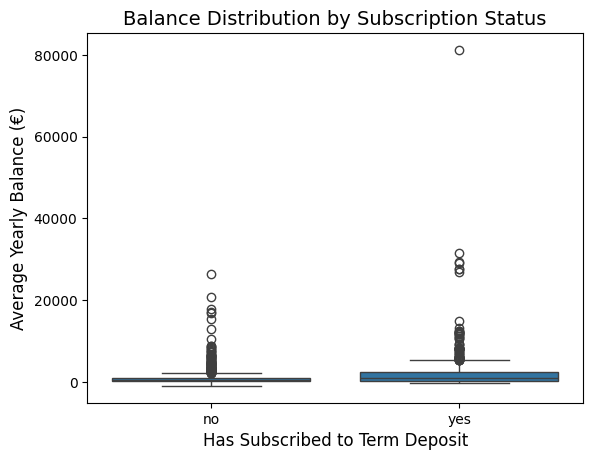

In [225]:
sns.boxplot(x='subscribed', y='avg_yearly_balance', data=df)
plt.title('Balance Distribution by Subscription Status', fontsize=14)
plt.xlabel('Has Subscribed to Term Deposit', fontsize=12)
plt.ylabel('Average Yearly Balance (€)', fontsize=12)
plt.show()

TODO: Check the higher avg yearly balance the more likely to subsrcribe

Number of balances below zero in avg_yearly_balance: 93


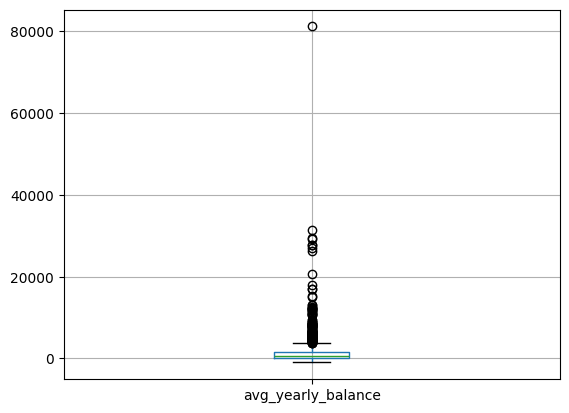

In [226]:
below_zero_count = (df['avg_yearly_balance'] < 0).sum()
print(f"Number of balances below zero in avg_yearly_balance: {below_zero_count}")

df.boxplot(column='avg_yearly_balance')
plt.show()

I decided to seperate the balances into positive and negative to better see the negative.

Number of positive balances: 1820
Number of negative balances: 93
Number of zero balances: 86


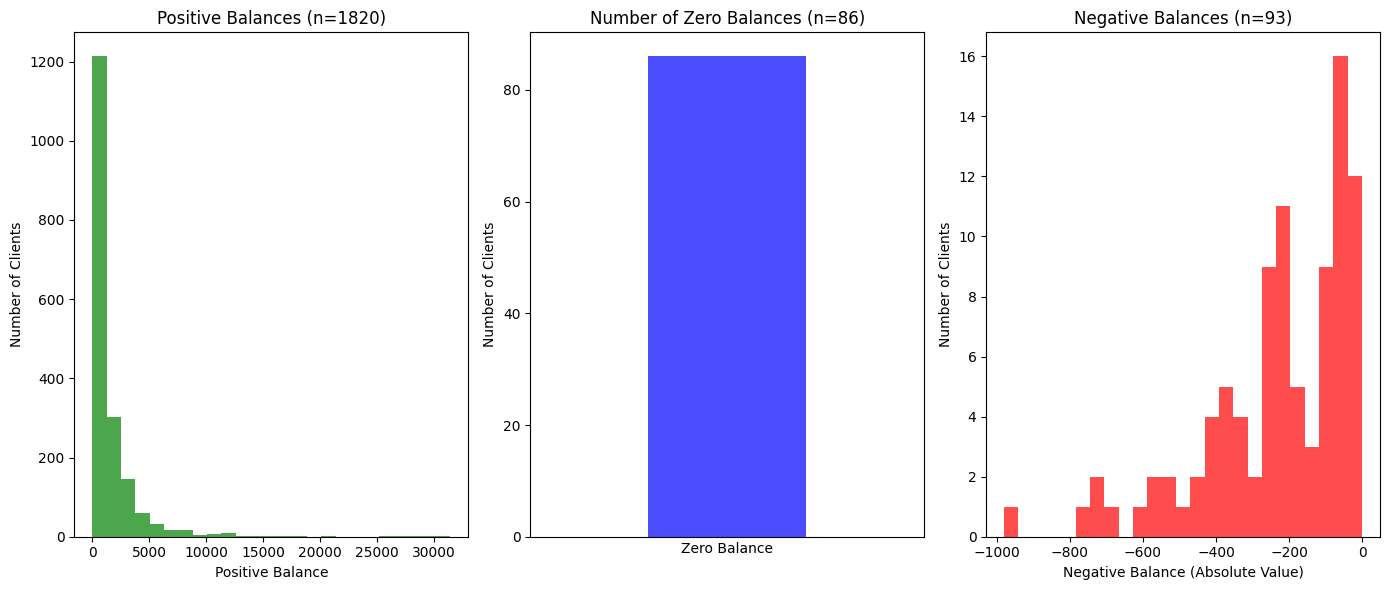

In [227]:
# Create a figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

# Set the number of bins you want
num_bins = 25

# Get positive and negative balances
positive_balances = df.loc[(df['avg_yearly_balance'] > 0) & (df['avg_yearly_balance'] != 81204), 'avg_yearly_balance']
zero_balances = df.loc[df['avg_yearly_balance'] == 0, 'avg_yearly_balance']
negative_balances = df.loc[df['avg_yearly_balance'] < 0, 'avg_yearly_balance']

# Create histograms
ax1.hist(positive_balances, bins=num_bins, color='green', alpha=0.7)
ax2.hist(zero_balances, bins=num_bins, color='blue', alpha=0.7)
ax3.hist(negative_balances, bins=num_bins, color='red', alpha=0.7)

# Add labels and titles
ax1.set_xlabel('Positive Balance')
ax1.set_ylabel('Number of Clients')
ax1.set_title(f'Positive Balances (n={len(positive_balances)})')

ax2.set_xlabel('Zero Balance')
ax2.set_ylabel('Number of Clients')
ax2.set_title(f'Number of Zero Balances (n={len(zero_balances)})')
ax2.set_xlim([-0.05, 0.05])
ax2.set_xticks([])

ax3.set_xlabel('Negative Balance (Absolute Value)')
ax3.set_ylabel('Number of Clients')
ax3.set_title(f'Negative Balances (n={len(negative_balances)})')

# Print the counts of positive and negative balances
print(f"Number of positive balances: {len(positive_balances)}")
print(f"Number of negative balances: {len(negative_balances)}")
print(f"Number of zero balances: {len(zero_balances)}")

plt.tight_layout()
plt.show()

 
7. housing_loan & personal_loan:

I wanted to check if a combination of having a loan and being in default corrilate to subscribing or not but there are not enough data points (11). However I think it is worth noting that only one of these 11 subscribed.

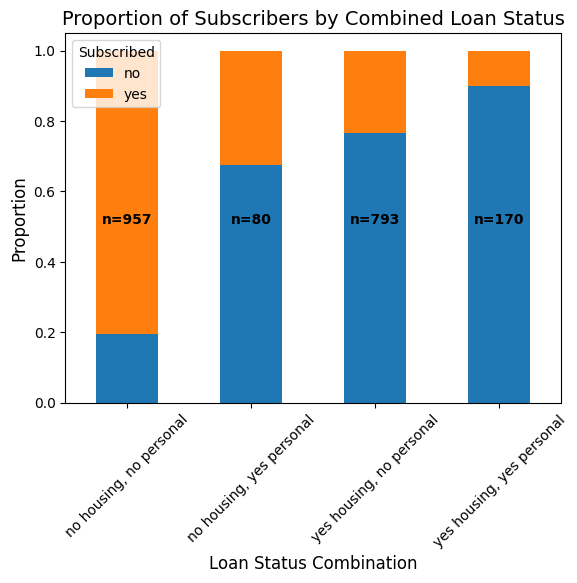

In [228]:
# Create combined loan status subscribed
df['loan_status'] = df['housing_loan'] + ' housing, ' + df['personal_loan'] + ' personal'

# Get total counts for each category
loan_counts = df.groupby(['loan_status', 'subscribed']).size().unstack(fill_value=0)
total_counts = loan_counts.sum(axis=1)

# Calculate counts
loan_counts = df.groupby(['loan_status', 'subscribed']).size().unstack(fill_value=0)
loan_props = loan_counts.div(loan_counts.sum(axis=1), axis=0)

# Plot stacked bars
loan_props.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Subscribers by Combined Loan Status', fontsize=14)

# Add the total number of clients for each category
for i, (idx, count) in enumerate(total_counts.items()):
    # Add label with category size at the top of each bar
    plt.text(i, 0.5, f"n={count:,}", ha='center', va='bottom', fontweight='bold')
    
plt.xlabel('Loan Status Combination', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Subscribed')
plt.xticks(rotation=45)

plt.show()

In [229]:
((df['credit_in_default'] == 'yes') & (df['personal_loan'] == 'yes') & (df['subscribed'] == 'yes')).sum()

np.int64(0)

In [230]:
((df['credit_in_default'] == 'yes') & (df['housing_loan'] == 'yes')).sum()

np.int64(8)

In [231]:
((df['credit_in_default'] == 'yes') & (df['housing_loan'] == 'yes') & (df['subscribed'] == 'yes')).sum()

np.int64(1)

In [232]:
((df['credit_in_default'] == 'yes') & (df['housing_loan'] == 'yes') & (df['personal_loan'] == 'yes')).sum()

np.int64(3)

#### related with the last contact of the current campaign:

9. contact_type: contact communication type (categorical: "telephone","cellular")


10. last_contact_day_of_month: last contact day of the month (numeric)


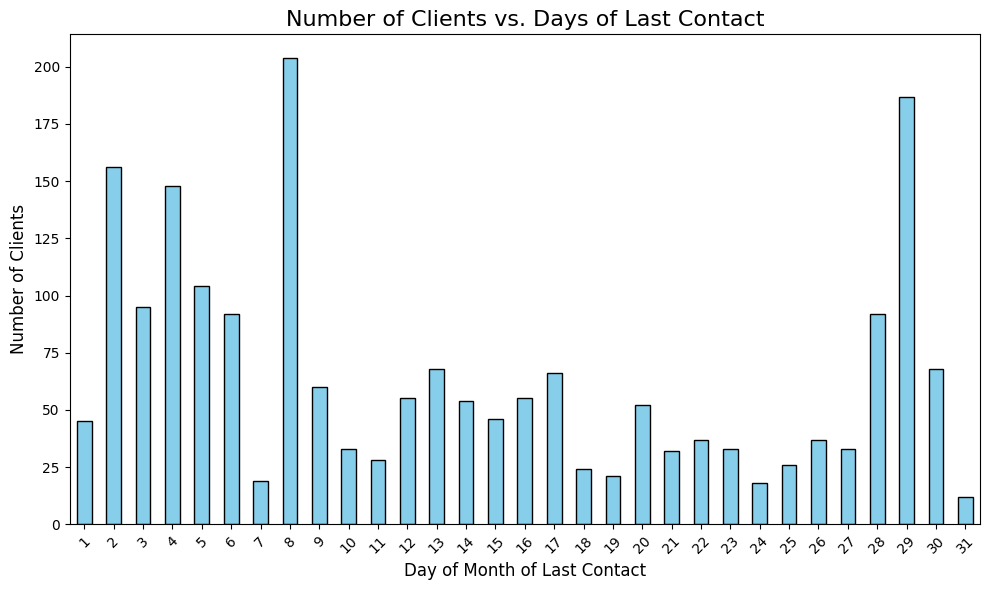

In [233]:
day_frequency_table = df['last_contact_day_of_month'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
day_frequency_table.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Number of Clients vs. Days of Last Contact', fontsize=16)
plt.xlabel('Day of Month of Last Contact', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Rotate month labels if needed
plt.xticks(rotation=45)
# Adjust the layout to avoid clipping
plt.tight_layout()  
plt.show()

11. last_contact_month_of_year last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")


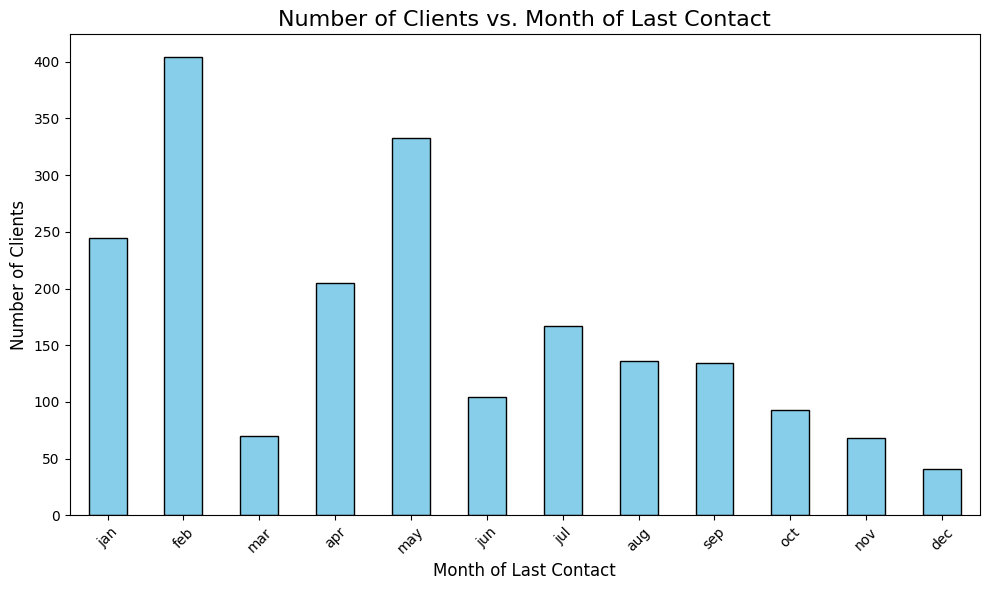

In [234]:
# Define the correct order of the months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the 'last_contact_month_of_year' to a categorical type with the correct order
df['last_contact_month_of_year'] = pd.Categorical(df['last_contact_month_of_year'], categories=month_order, ordered=True)

# Get the frequency count and sort by the custom month order
month_frequency_table = df['last_contact_month_of_year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
month_frequency_table.plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Number of Clients vs. Month of Last Contact', fontsize=16)
plt.xlabel('Month of Last Contact', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)

# Rotate month labels if needed
plt.xticks(rotation=45)
# Adjust the layout to avoid clipping
plt.tight_layout()  
plt.show()

<Figure size 1200x700 with 0 Axes>

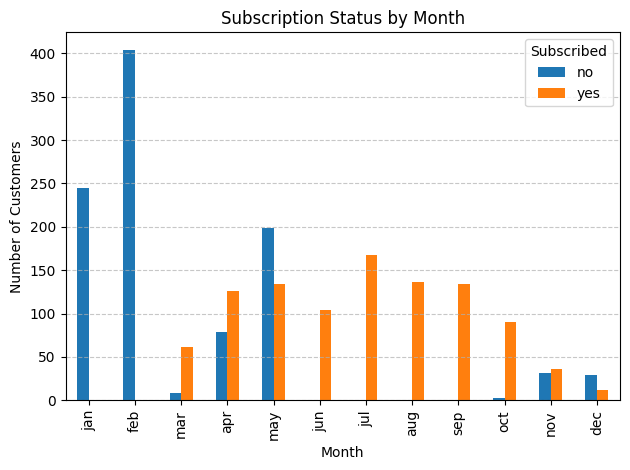

In [235]:
# Count subscriptions by month
subscription_by_month = pd.crosstab(df['last_contact_month_of_year'], df['subscribed'])

# Plot the data
plt.figure(figsize=(12, 7))
subscription_by_month.plot(kind='bar')

plt.title('Subscription Status by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

12. last_contact_duration: last contact duration, in seconds (numeric)


#### other attributes:

13. number_of_campaign_contacts: number of contacts performed during this campaign and for this client (numeric, includes last contact)


14. days_since_prev_campaign_contact: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)


In [236]:
print(f'{int((df['days_since_prev_campaign_contact'] == -1).sum())} clients were not not contacted about a previous campaign.')

454 clients were not not contacted about a previous campaign.


15. previous_campaign_contacts: number of contacts performed before this campaign and for this client (numeric)


16. prev_campaign_outcome: outcome of the previous marketing campaign (categorical: "other","failure","success")

From the above plot our data suggests that people over 60 are likely to subscribe.

One person with credit in default is subscribed. Fourteen people are non-subscribers with credit in default.

From the above we can tell that 164 out of 165 over 60's subscribed. Where below 60's are slight more inclined to not subscribe.

It is a small sample of over 60's but still over 99% of them subscribed.

If they have a loan they are more likely to not subscribe.

I think from this plot it can be concluded that January (245 no and 0 yes) and February (404 no and 0 yes) are bad months to try an subscribe a potential client. Where as between June and October (with a combined 631 yes and 3 no).

Exploritory Data analysis

Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).

Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

Make sure your conclusions are related to the question you have formulated.

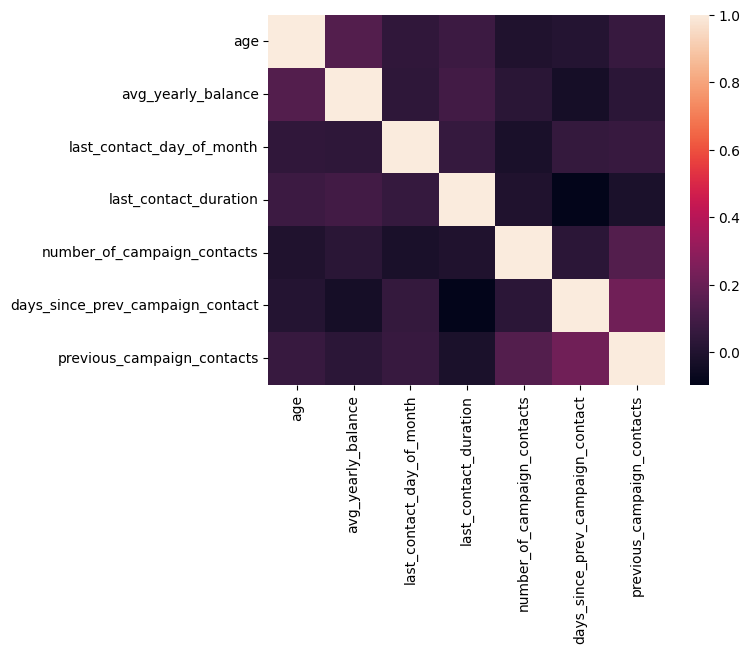

In [237]:
#correlation matrix
sns.heatmap(df_numeric.corr())
plt.show()

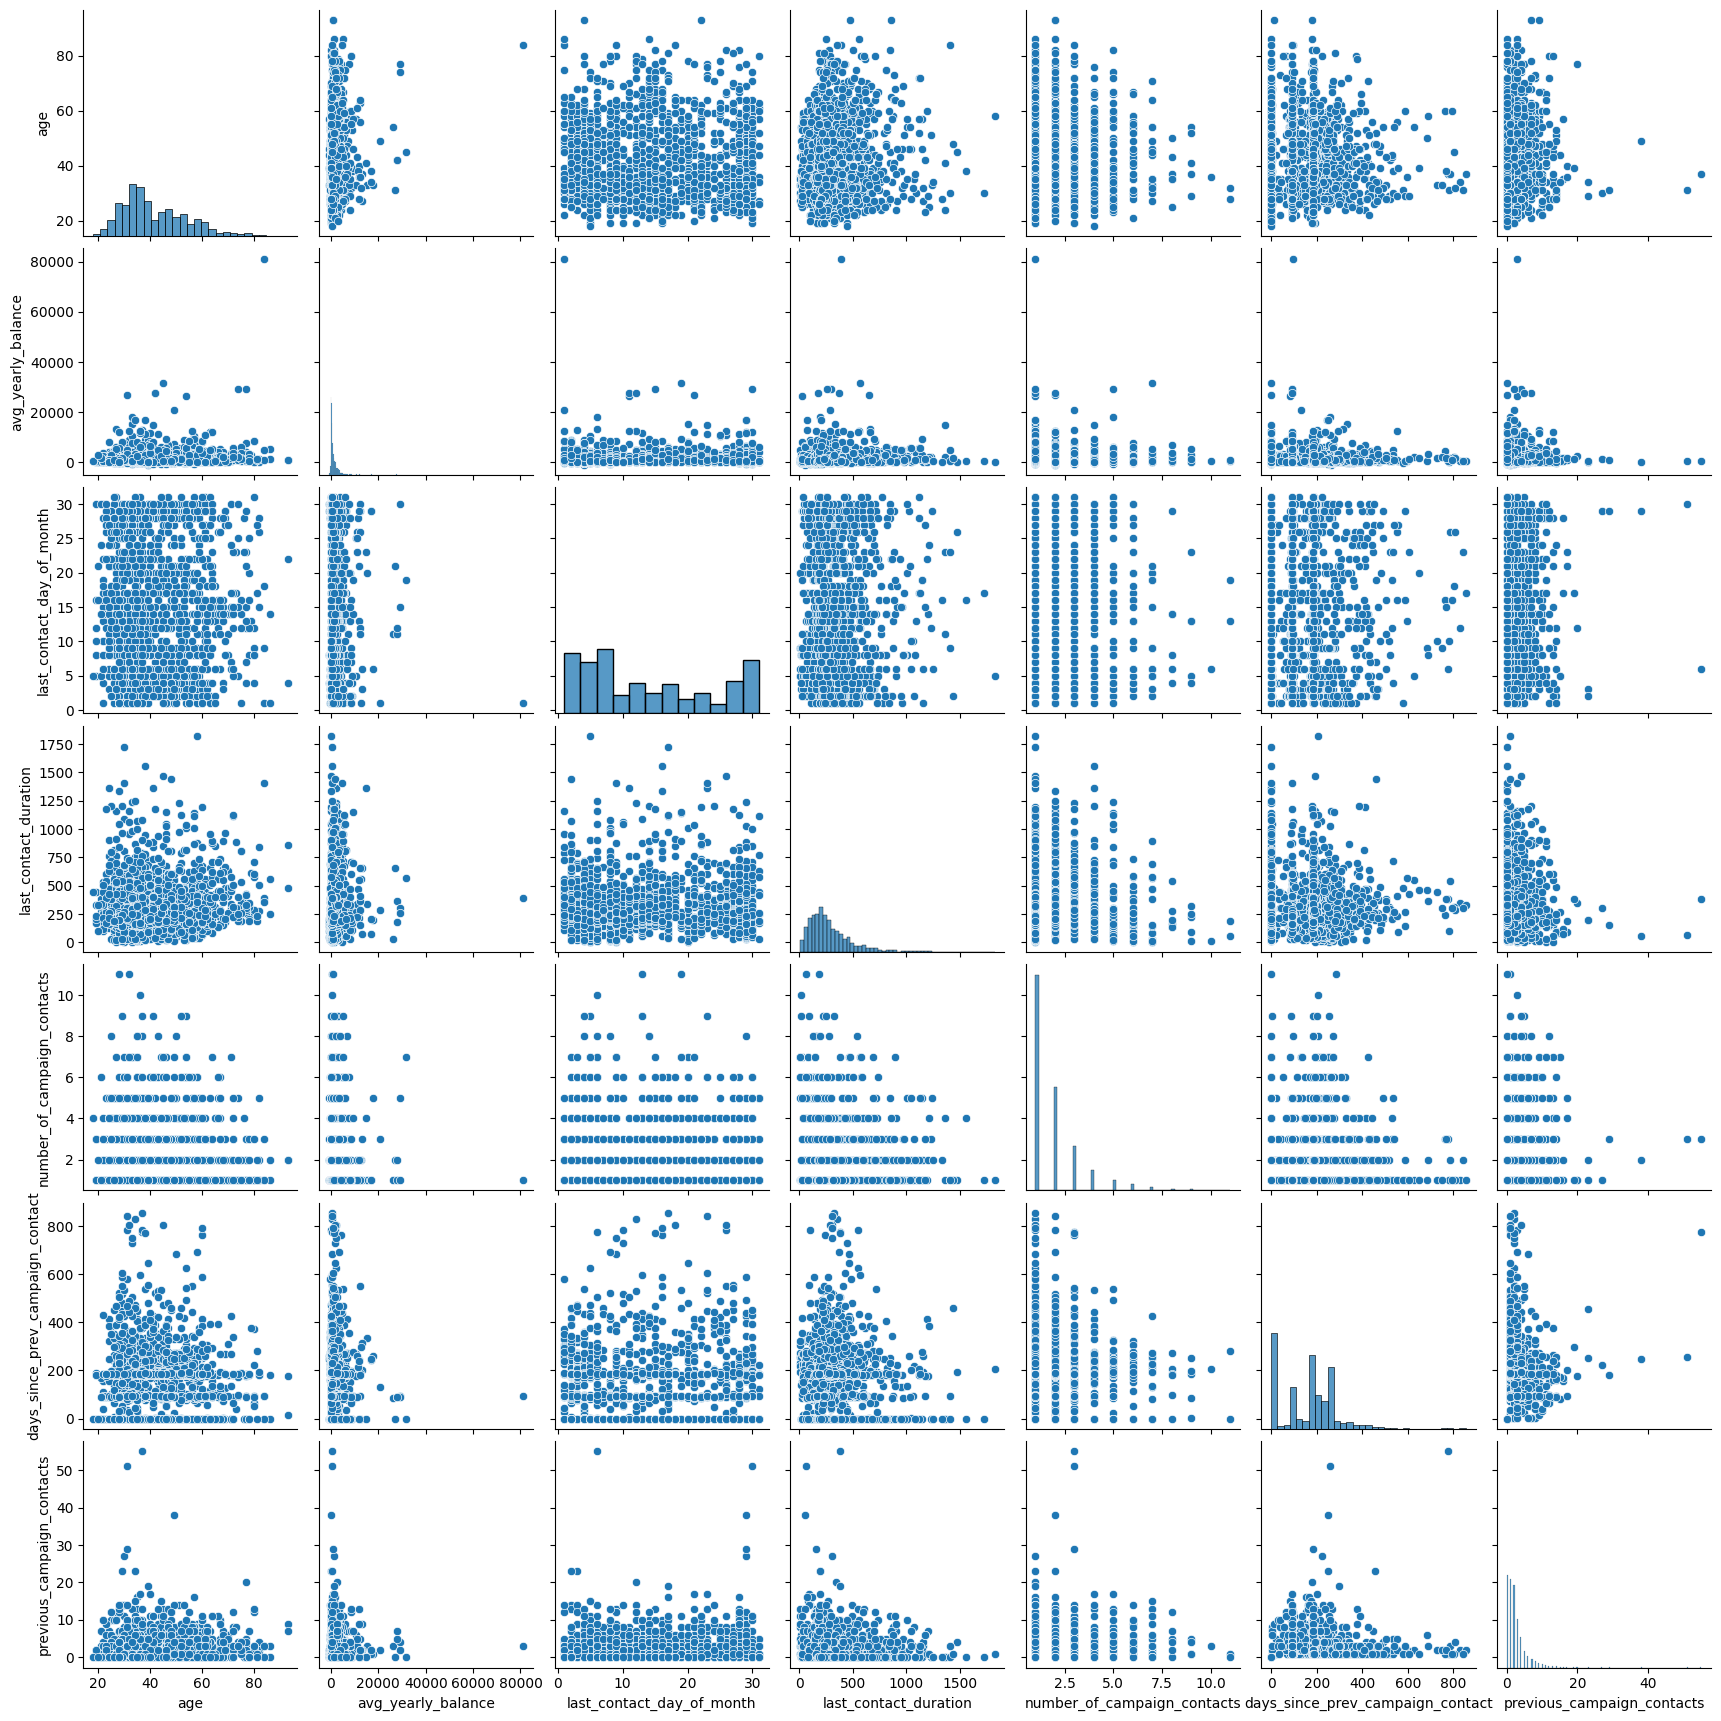

In [238]:
# pair plot
sns.pairplot(data=df_numeric.dropna())
plt.show()

Is it beneifical to combine last contact month and day?

# Task 2: Data Preparation

Ensure that you have:

 - encoded all categorical attributes as numerical,
 - filled in all missing values,
 - applied a scaler to rescale features,
 - treated outliers and skewed attribute distribution appropriately,
 - created at least one new feature from the existing ones.

In [239]:
# Create a mapper

scale_mapper = {
    "jan": 0,
    "feb": 1,
    "mar": 2,
    "apr": 3,
    "may": 4,
    "jun": 5,
    "jul": 6,
    "aug": 7,
    "sep": 8,
    "oct": 9,
    "nov": 10,
    "dec": 11
}

df['last_contact_month_of_year'] = df['last_contact_month_of_year'].replace(scale_mapper)

df.tail()

C:\Users\seanp\AppData\Local\Temp\ipykernel_23976\364383399.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['last_contact_month_of_year'] = df['last_contact_month_of_year'].replace(scale_mapper)
C:\Users\seanp\AppData\Local\Temp\ipykernel_23976\364383399.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['last_contact_month_of_year'] = df['last_contact_month_of_year'].replace(scale_mapper)


,age,job,marital,education,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,contact_type,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts,prev_campaign_outcome,subscribed,loan_status
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes,"no housing, no personal"
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes,"no housing, no personal"
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes,"no housing, no personal"
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes,"yes housing, no personal"
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes,"no housing, no personal"


In [248]:
df_categorical.columns

Index(['job', 'marital', 'education', 'credit_in_default', 'housing_loan',
       'personal_loan', 'contact_type', 'last_contact_month_of_year',
       'prev_campaign_outcome', 'subscribed'],
      dtype='object')

In [240]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['contact_type', 'education', 'job'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,credit_in_default,avg_yearly_balance,housing_loan,personal_loan,last_contact_day_of_month,last_contact_month_of_year,last_contact_duration,number_of_campaign_contacts,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
1995,20.0,single,no,2785,no,no,16,8,327,2,...,False,False,False,False,False,False,True,False,False,False
1996,28.0,single,no,127,no,no,16,8,1334,2,...,False,False,False,False,False,False,False,False,False,False
1997,81.0,married,no,1154,no,no,17,8,231,1,...,False,False,False,True,False,False,False,False,False,False
1998,46.0,married,no,4343,yes,no,20,8,185,1,...,False,False,False,False,False,True,False,False,False,False
1999,40.0,married,no,6403,no,no,22,8,208,2,...,True,False,False,False,False,False,False,False,False,False


In [241]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,avg_yearly_balance,last_contact_day_of_month,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts,contact_type_telephone,contact_type_nan,education_secondary,...,last_contact_month_of_year_8,last_contact_month_of_year_9,last_contact_month_of_year_10,last_contact_month_of_year_11,prev_campaign_outcome_other,prev_campaign_outcome_success,subscribed_yes,"loan_status_no housing, yes personal","loan_status_yes housing, no personal","loan_status_yes housing, yes personal"
0,32.0,392,1,957,2,131,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,39.0,688,1,233,2,133,1,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,59.0,1035,1,126,2,239,1,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,47.0,398,1,274,1,238,2,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,54.0,1004,1,479,1,307,1,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [242]:
# # Convert Yes/No to 1/0
# binary_category = ['subscribed', 'credit_in_default', 'housing_loan', 'personal_loan']
# df[binary_category] = df[binary_category].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# df.select_dtypes(include=['object'])

In [250]:
df_numeric.head()

,age,avg_yearly_balance,last_contact_day_of_month,last_contact_duration,number_of_campaign_contacts,days_since_prev_campaign_contact,previous_campaign_contacts
0,32.0,392,1,957,2,131,2
1,39.0,688,1,233,2,133,1
2,59.0,1035,1,126,2,239,1
3,47.0,398,1,274,1,238,2
4,54.0,1004,1,479,1,307,1


In [251]:
df_numeric.isna().sum()

age                                 12
avg_yearly_balance                   0
last_contact_day_of_month            0
last_contact_duration                0
number_of_campaign_contacts          0
days_since_prev_campaign_contact     0
previous_campaign_contacts           0
dtype: int64

In [253]:
# Check there are no negative values
all_non_negative = (df[['last_contact_day_of_month', 'last_contact_duration', 'number_of_campaign_contacts', 'previous_campaign_contacts']] >= 0).all().all()
all_non_negative

np.True_

In [255]:
has_zero_values = (df[['days_since_prev_campaign_contact']] == 0).all().all()
has_zero_values

np.False_

In [256]:
has_zero_values = (df[['days_since_prev_campaign_contact']] < -1).all().all()
has_zero_values

np.False_

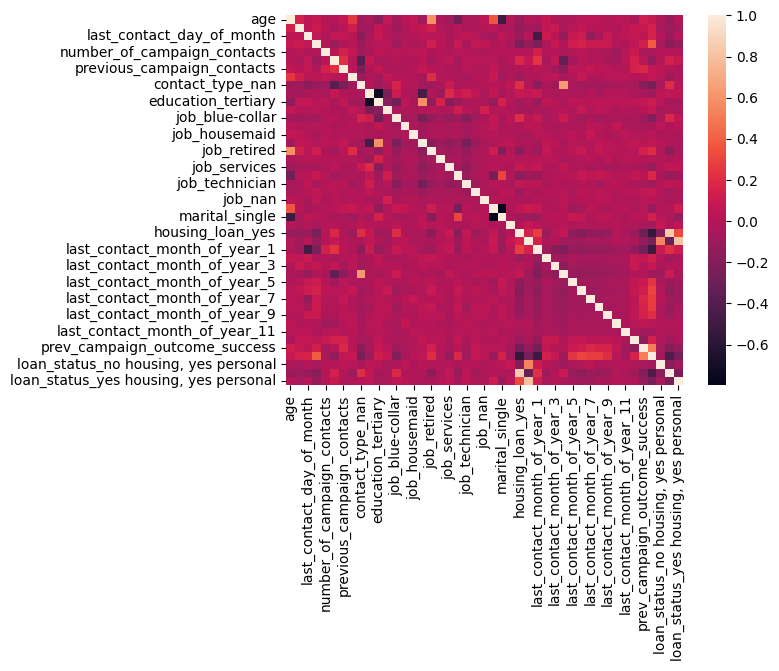

In [243]:
#correlation matrix
sns.heatmap(df.corr(numeric_only=True))
plt.show()